# Exploratory Data Analysis<a id='Exploratory_Data_Analysis'></a>

# 1.1 Contents<a id='1.1_Contents'></a>
* [1 Exploratory Data Analysis](#1_Exploratory_Data_Analysis)
  * [1.1 Imports](#1.1_Imports)
  * [1.2 Load The Data](#1.2_Load_The_Data)
  * [1.3 Explore The Data](#1.3_Explore_The_Data)
    * [1.3.1 Visualizing High Dimensional Data](#1.3.1_Visualizing_High_Dimensional_Data)
      * [1.3.1.1 Average Door Swings Per State](#1.3.1.1_Average_Door_Swings_Per_State)
      * [1.3.1.2 Distribution of Door Swings By State](#1.3.1.1_Distribution_of_Door_Swings_By_State)
    * [1.3.2 Numeric Features](#1.3.1_Numeric_Features)
      * [1.3.2.1 Numeric Data Summary](#1.3.1.1_Numeric_Data_Summary)
  * [1.4 Hypotheses](#1.4_Hypotheses)   
    * [1.4.1 Hypothesis #1](#1.4.1_Hypothesis_#1)
      * [1.4.1.1 Pulling in the Data](#1.4.1.1_Pulling_in_the_Data)
      * [1.4.1.2 Explore the Data](#1.4.1.2_Explore_the_Data)
      * [1.4.1.3 Analyzing the Data](#1.4.1.2_Analyzing_the_Data)
    * [1.4.2 Hypothesis #2](#1.4.2_Hypothesis_#2)
      * [1.4.2.1 Explore the Data](#1.4.2.1_Explore_the_Data)
      * [1.4.2.2 Analyzing the Data](#1.4.2.2_Analyzing_the_Data)
  * [1.5 Summary](#1.5_Summary)  

## 1.1 Imports

In [19]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
from Username_PW import *

## 1.2 Load The Data

In [20]:
df = pd.read_excel(r'C:\Users\asiu200\OneDrive - Comcast\Python\Springboard\Data Wrangling.xlsx')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74789 entries, 0 to 74788
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Traffic_Date      74789 non-null  datetime64[ns]
 1   STORE_NAME        74789 non-null  object        
 2   STORE_CITY_NAME   74789 non-null  object        
 3   STORE_STATE_CODE  74789 non-null  object        
 4   Door_Swings       74789 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


In [22]:
df.rename(columns={'STORE_NAME' : 'store_name', 'Traffic_Date' : 'date', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','Door_Swings' : 'door_swings'}, inplace=True)

In [23]:
df.head()

,date,store_name,city,state,door_swings
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
1,2014-12-22,"3352 - Lakewood, CO (XF)",Lakewood,CO,452
2,2014-12-22,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,562
3,2014-12-22,"3354 - Thornton, CO (XF)",Thornton,CO,594
4,2014-12-22,"3356 - Boulder, CO (XF)",Boulder,CO,369


## 1.3 Explore The Data

In [24]:
print(df.store_name.value_counts())

3353 - Colorado Springs, CO (XF)                                2891
3354 - Thornton, CO (XF)                                        2891
3352 - Lakewood, CO (XF)                                        2891
3456 - Layton2, UT (XF)                                         2887
3357 - Centennial, CO (XF)                                      2879
3453 - Orem, UT (XF)                                            2857
3351 - Albuquerque, NM (XF)                                     2841
3356 - Boulder, CO (XF)                                         2822
3455 - Draper, UT (XF)                                          2718
3359 - Loveland, CO (XF)                                        2489
3360 - Arvada, CO (XF)                                          2134
3457 - Salt Lake City, UT (XF)                                  2041
3361 - Longmont, CO (XF)                                        1904
3358 - Denver, CO (XF)                                          1829
3362 - Pueblo, CO (XF)            

There are stores that have higher amounts of data points because either they opened after 01-01-2019 or the stores have closed down and are no longer open.

In [25]:
count = df[['state', 'store_name']].nunique()
print(count)

state          4
store_name    50
dtype: int64


We cover four states and have 50 stores in our specific region.

In [26]:
print(df.groupby('state')['store_name'].nunique())

state
AZ     2
CO    29
NM     6
UT    13
Name: store_name, dtype: int64


Out of the four states, CO has the most stores open, while AZ has the least amount.

### 1.3.1 Visualizing High Dimensional Data

#### 1.3.1.1 Average Door Swings Per State

In [27]:
state_avg_ds = df.groupby('state')['door_swings'].mean()
state_avg_ds.head()

state
AZ    190.512353
CO    260.751677
NM    377.025080
UT    202.568478
Name: door_swings, dtype: float64

In [28]:
df.sort_values(['door_swings'],ascending=False).head(20)

,date,store_name,city,state,door_swings
9577,2017-08-11,"3360 - Arvada, CO (XF)",Arvada,CO,1683
9238,2017-07-16,"3354 - Thornton, CO (XF)",Thornton,CO,1582
83,2014-12-31,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,1509
38246,2020-09-03,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1291
16860,2018-10-27,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,1274
9842,2017-09-01,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1272
18287,2018-12-29,"3360 - Arvada, CO (XF)",Arvada,CO,1249
39374,2020-10-01,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1234
22417,2019-06-03,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,1224
38207,2020-09-02,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1218


It is interesting to note that NM has the highest average door swings, and the Albuquerque store in NM has 10 out of the 20 highest door swings in the past eight years.

(array([8.2080e+03, 1.9344e+04, 1.7196e+04, 1.2314e+04, 6.7630e+03,
        3.8420e+03, 2.7360e+03, 1.7920e+03, 1.0800e+03, 7.2300e+02,
        4.2600e+02, 2.1000e+02, 9.2000e+01, 4.5000e+01, 1.2000e+01,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0.  ,   84.15,  168.3 ,  252.45,  336.6 ,  420.75,  504.9 ,
         589.05,  673.2 ,  757.35,  841.5 ,  925.65, 1009.8 , 1093.95,
        1178.1 , 1262.25, 1346.4 , 1430.55, 1514.7 , 1598.85, 1683.  ]),
 <BarContainer object of 20 artists>)

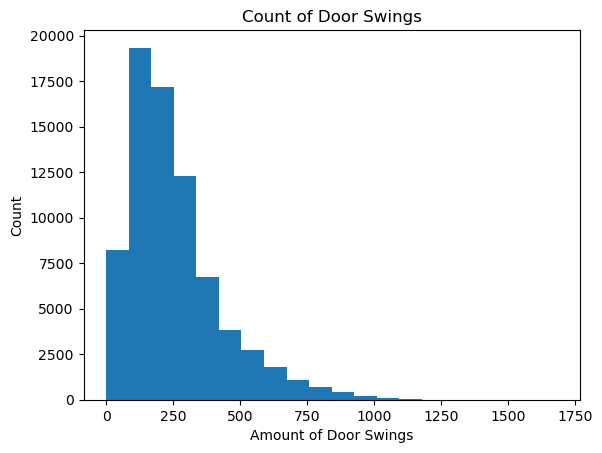

In [204]:
plt.xlabel('Amount of Door Swings')
plt.ylabel('Count')
plt.title('Count of Door Swings')
plt.hist(df['door_swings'], bins=20)

The most recurring number of daily door swings is between 0 and 300.

In [30]:
df['door_swings'].value_counts()

0       2286
162      265
106      265
158      263
137      261
        ... 
1003       1
1039       1
1043       1
1161       1
1012       1
Name: door_swings, Length: 1105, dtype: int64

I wanted to see if a specific number of door swings occurred more than others.

#### 1.3.1.2 Distribution of Door Swings By State

In [31]:
state_mean_doorswings = df.groupby('state')[['door_swings']].mean()
state_mean_doorswings.head()

,door_swings
state,
AZ,190.512353
CO,260.751677
NM,377.025080
UT,202.568478


I wanted to know which states had the highest number of door swings. It is interesting to note that NM has the highest number of door swings compared to CO. Because CO has 29 stores, NM only has six stores.

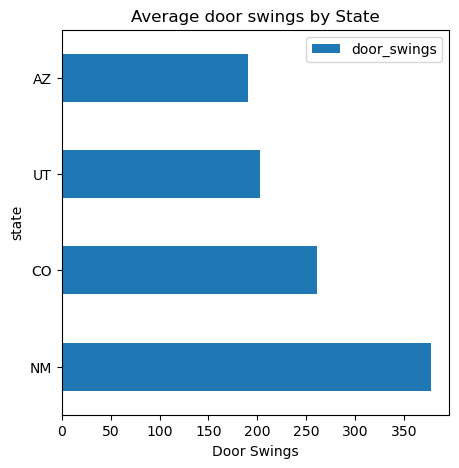

In [32]:
(state_mean_doorswings.reindex(index=state_mean_doorswings.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(5, 5), title='Average door swings by State'))
plt.xlabel('Door Swings');

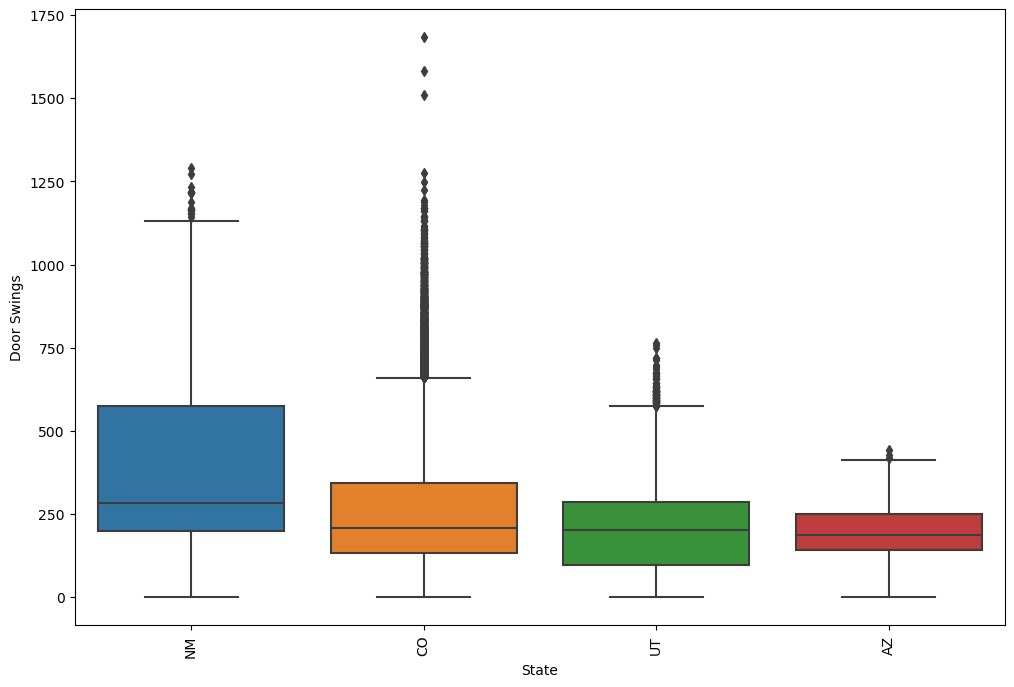

In [33]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='door_swings', data=df)
plt.xticks(rotation='vertical')
plt.ylabel('Door Swings')
plt.xlabel('State');

### 1.3.2 Numeric Features

#### 1.3.2.1 Numeric Data Summary

In [34]:
df.describe()

,door_swings
count,74789.000000
mean,253.804129
std,177.083237
min,0.000000
25%,131.000000
50%,214.000000
75%,328.000000
max,1683.000000


It is interesting to see that we had a store have almost 1700 customers go into a store in one given day.

In [35]:
df.groupby(pd.Grouper(key='date', freq='1Y')).sum().head(10)

,door_swings
date,
2014-12-31,32174
2015-12-31,1275108
2016-12-31,1301189
2017-12-31,1602200
2018-12-31,2321143
2019-12-31,3203486
2020-12-31,3249148
2021-12-31,3145370
2022-12-31,2851939


Interestingly, our door swings increased from 2019 to 2020 when the pandemic was at its height.

## 1.4 Hypotheses

### 1.4.1 Hypothesis #1

I would like to know if there are specific months when we have more equipment, payment, or work order transactions. Equipment transactions are where customers come in to pick up, swap, or return equipment, and payment transactions are where customers come in to make payments either with a rep or at a kiosk. Work order transactions are where customers go into a store and add, remove, or modify their services. Transaction count will not match up with door swings because some can come in and leave without waiting or an emergency arises.

#### 1.4.1.1 Pulling in the Data

In [9]:
link = 'DRIVER={DRIVERNAME};DBCNAME={hostname};Authentication=LDAP; UID={uid};PWD={pwd}'.format(
    DRIVERNAME='Teradata Database ODBC Driver 16.20', hostname='172.28.130.20',
    uid= username ,Database='WAVE_DAILY_XFINITY_STORES', pwd= password)

conn = pyodbc.connect(link)

cus=conn.cursor()
print('Connection to Teradata NDW established')

sql_query = pd.read_sql_query("""

SELECT	XS.RECORD_DATE
,XS.COMCAST_STORE_NAME
,SL.STORE_CITY_NAME
,SL.STORE_STATE_CODE
,SUM(XS.EQUIPMENT_CUSTOMER_CNT) as EQUIPMENT_TRANSACTIONS
,SUM(XS.PAYMENT_CUSTOMER_CNT) as PAYMENT_TRANSACTIONS
,SUM(XS.WORK_ORDER_TRANSACTIONS_CNT) as WORK_ORDER_TRANSACTIONS
,SUM(XS.EQUIPMENT_CUSTOMER_CNT + PAYMENT_CUSTOMER_CNT + WORK_ORDER_TRANSACTIONS_CNT) as TOTAL_TRANSACTIONS
FROM	NDW_SALESCOMP_ANALYTICS_VIEWS.WAVE_DAILY_XFINITY_STORES_STATS_SUMMARY as XS
INNER JOIN NDW_SALESCOMP_ANALYTICS_VIEWS.WAVE_DAILY_XFINITY_STORE_LISTING as SL
ON XS.COMCAST_STORE_NAME = SL.STORE_NAME
WHERE 1 = 1
AND XS.REGION_NAME = 'Mountain West Region'
AND XS.RECORD_DATE <= Current_Date
AND XS.COMCAST_STORE_NAME IN (
'3351 - Albuquerque, NM (XF)',
'3352 - Lakewood, CO (XF)',
'3353 - Colorado Springs, CO (XF)',
'3354 - Thornton, CO (XF)',
'3355 - Las Cruces, NM (XF)',
'3356 - Boulder, CO (XF)',
'3357 - Centennial, CO (XF)',
'3358 - Denver, CO (XF)',
'3359 - Loveland, CO (XF)',
'3360 - Arvada, CO (XF)',
'3361 - Longmont, CO (XF)',
'3362 - Pueblo, CO (XF)',
'3363 - Fort Collins, CO (XF)',
'3364 - Barnes Marketplace - Colorado Springs, CO (XF)',
'3365 - Gardens on Havana - Aurora, CO (XF)',
'3367 - Animas Valley Mall - Farmington, NM (XF)',
'3368 - Prairie Center - Brighton, CO (XF)',
'3369 - Plaza Santa Fe - Santa Fe, NM (XF)',
'3370 - Promenade at Castle Rock - Castle Rock, CO (XF)',
'3371 - Crown Point - Parker, CO (XF)',
'3372 - The Shops at NorthCreek - Denver, CO (XF)',
'3373 - Orchard Town Center - Westminster, CO (XF)',
'3374 -Shops at Walnut Creek -Westminster, CO (XF)',
'3403 - Park City, UT',
'3453 - Orem, UT (XF)',
'3454 - Tucson - River, AZ (XF)',
'3455 - Draper, UT (XF)',
'3456 - Layton2, UT (XF)',
'3457 - Salt Lake City, UT (XF)',
'3458 - Academy Square - Logan, UT (XF)',
'3459 - Arizona Pavilions - Tucson, AZ (XF)',
'3460 - Jordan Landing - West Jordan, UT (XF)',
'3461 - Fashion Plaza - Murray, UT (XF)',
'3463 - Summit Place - Silverthorne, CO (XF)',
'3464 - Glenwood Meadows - Glenwood Springs, CO (XF)',
'59000 - Southwest Plaza - Littleton, CO (XF)',
'59001 - Applewood Village - Wheat Ridge, CO (XF)',
'59002 - Greeley - Greeley, CO (XF)',
'59003 - Northfield Stapleton - Denver, CO (XF)',
'59008 - Southglenn/Cherry Hills - Greenwood Village, CO (XF)',
'59009 - South Aurora - Aurora, CO (XF)',
'59011 - River Point at Sheridan - Sheridan, CO (XF)',
'59031 - Hunter''s Crossing - American Fork, UT (XF)',
'59032 - Sugarhouse  - Salt Lake City, UT (XF)',
'59033 -Mountain View Village -  Riverton, UT (XF)',
'59034 - Highbury Centre - West Valley City, UT (XF)',
'59038 -  Diamond Plaza - Ogden, UT (XF)',
'59046 - Broadmoor Towne Center - Colorado Springs, CO (XF)',
'59055 - Albuquerque, NM (Uptown)',
'59056 - Albuquerque, NM (Cottonwood) (BP)')

GROUP BY 1,2,3,4

ORDER BY 1 DESC, 2,3,4



""", conn)

df = pd.DataFrame(sql_query, columns = ['RECORD_DATE', 'COMCAST_STORE_NAME', 'STORE_CITY_NAME', 'STORE_STATE_CODE','EQUIPMENT_TRANSACTIONS','PAYMENT_TRANSACTIONS','WORK_ORDER_TRANSACTIONS','TOTAL_TRANSACTIONS'])

conn.close()
print("Connection Closed")

print(df)

savePathReport = r'C:\Users\asiu200\OneDrive - Comcast\Python\Springboard'
xlsxReportName = 'Hypothesis 1.xlsx'

os.chdir(savePathReport)
wb = openpyxl.load_workbook(xlsxReportName)
sheet = wb.active
wb.remove(sheet)

wb.create_sheet(title=("Hypothesis 1"))

wb.save(xlsxReportName)

writer = pd.ExcelWriter(r'C:\Users\asiu200\OneDrive - Comcast\Python\Springboard\Hypothesis 1.xlsx', engine ='openpyxl', mode='a', if_sheet_exists='replace')

df.to_excel(writer, sheet_name='Hypothesis 1', index = False)

workbook = writer.book
worksheet = writer.sheets['Hypothesis 1']
    
writer.save()
       
print('Excel Sheet Saved')

Connection to Teradata NDW established


C:\Users\asiu200\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Connection Closed
      RECORD_DATE                COMCAST_STORE_NAME   STORE_CITY_NAME  \
0      2022-11-28       3351 - Albuquerque, NM (XF)       Albuquerque   
1      2022-11-28          3352 - Lakewood, CO (XF)          Lakewood   
2      2022-11-28  3353 - Colorado Springs, CO (XF)  Colorado Springs   
3      2022-11-28          3354 - Thornton, CO (XF)          Thornton   
4      2022-11-28        3355 - Las Cruces, NM (XF)        Las Cruces   
...           ...                               ...               ...   
81804  2014-11-22              3403 - Park City, UT         Park City   
81805  2014-11-22              3453 - Orem, UT (XF)              Orem   
81806  2014-11-22    3454 - Tucson - River, AZ (XF)            Tucson   
81807  2014-11-22            3455 - Draper, UT (XF)            Draper   
81808  2014-11-22           3456 - Layton2, UT (XF)            Layton   

      STORE_STATE_CODE  EQUIPMENT_TRANSACTIONS  PAYMENT_TRANSACTIONS  \
0                   NM           

In [302]:
df2 = pd.read_excel(r'C:\Users\asiu200\OneDrive - Comcast\Python\Springboard\Hypothesis 1.xlsx')

#### 1.4.1.2 Explore the Data

In [303]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81809 entries, 0 to 81808
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   RECORD_DATE              81809 non-null  datetime64[ns]
 1   COMCAST_STORE_NAME       81809 non-null  object        
 2   STORE_CITY_NAME          81809 non-null  object        
 3   STORE_STATE_CODE         81809 non-null  object        
 4   EQUIPMENT_TRANSACTIONS   81809 non-null  int64         
 5   PAYMENT_TRANSACTIONS     81809 non-null  int64         
 6   WORK_ORDER_TRANSACTIONS  81809 non-null  int64         
 7   TOTAL_TRANSACTIONS       81809 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 5.0+ MB


In [304]:
df2.rename(columns={'COMCAST_STORE_NAME' : 'store_name', 'RECORD_DATE' : 'date', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','EQUIPMENT_TRANSACTIONS' : 'equipment_transactions','PAYMENT_TRANSACTIONS' : 'payment_transactions', 'WORK_ORDER_TRANSACTIONS' : 'work_order_transactions', 'TOTAL_TRANSACTIONS' : 'total_transactions'}, inplace=True)

In [305]:
df3 = pd.merge(df,df2, how='left')

I merged the door swing and transaction data so that I could work with one dataframe.

In [306]:
print(df3.head(10))

        date                        store_name              city state  \
0 2014-12-22       3351 - Albuquerque, NM (XF)       Albuquerque    NM   
1 2014-12-22          3352 - Lakewood, CO (XF)          Lakewood    CO   
2 2014-12-22  3353 - Colorado Springs, CO (XF)  Colorado Springs    CO   
3 2014-12-22          3354 - Thornton, CO (XF)          Thornton    CO   
4 2014-12-22           3356 - Boulder, CO (XF)           Boulder    CO   
5 2014-12-22        3357 - Centennial, CO (XF)        Centennial    CO   
6 2014-12-22              3453 - Orem, UT (XF)              Orem    UT   
7 2014-12-22            3455 - Draper, UT (XF)            Draper    UT   
8 2014-12-22           3456 - Layton2, UT (XF)            Layton    UT   
9 2014-12-23       3351 - Albuquerque, NM (XF)       Albuquerque    NM   

   door_swings  equipment_transactions  payment_transactions  \
0          656                     0.0                   0.0   
1          452                     0.0                   

In [307]:
df3['month_year'] = pd.to_datetime(df3['date']).dt.to_period('M')
df3['month'] = df['date'].dt.month

My original question was to see if there were specific days that people came in for particular transactions. I added the `month_year` column to see which month was the highest per store.

In [308]:
print(df3.head())

        date                        store_name              city state  \
0 2014-12-22       3351 - Albuquerque, NM (XF)       Albuquerque    NM   
1 2014-12-22          3352 - Lakewood, CO (XF)          Lakewood    CO   
2 2014-12-22  3353 - Colorado Springs, CO (XF)  Colorado Springs    CO   
3 2014-12-22          3354 - Thornton, CO (XF)          Thornton    CO   
4 2014-12-22           3356 - Boulder, CO (XF)           Boulder    CO   

   door_swings  equipment_transactions  payment_transactions  \
0          656                     0.0                   0.0   
1          452                     0.0                   0.0   
2          562                     0.0                   0.0   
3          594                     0.0                   0.0   
4          369                     0.0                   0.0   

   work_order_transactions  total_transactions month_year  month  
0                     63.0                63.0    2014-12     12  
1                     77.0          

In [309]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74789 entries, 0 to 74788
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     74789 non-null  datetime64[ns]
 1   store_name               74789 non-null  object        
 2   city                     74789 non-null  object        
 3   state                    74789 non-null  object        
 4   door_swings              74789 non-null  int64         
 5   equipment_transactions   74034 non-null  float64       
 6   payment_transactions     74034 non-null  float64       
 7   work_order_transactions  74034 non-null  float64       
 8   total_transactions       74034 non-null  float64       
 9   month_year               74789 non-null  period[M]     
 10  month                    74789 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3), period[M](1)
memory usage: 6.8+ MB


#### 1.4.1.3 Analyzing the Data

In [330]:
store_month_total_trans_max = df3.groupby(['month_year','store_name'])['total_transactions'].max()
print(store_month_total_trans_max.sort_values(ascending=False).head(20))

month_year  store_name                                      
2021-07     59002 - Greeley - Greeley, CO (XF)                  865.0
2021-09     59002 - Greeley - Greeley, CO (XF)                  807.0
2021-08     59002 - Greeley - Greeley, CO (XF)                  803.0
2021-06     59002 - Greeley - Greeley, CO (XF)                  763.0
2021-10     59002 - Greeley - Greeley, CO (XF)                  756.0
2021-07     59000 - Southwest Plaza - Littleton, CO (XF)        694.0
2021-08     59000 - Southwest Plaza - Littleton, CO (XF)        667.0
2021-10     59000 - Southwest Plaza - Littleton, CO (XF)        642.0
2021-09     59000 - Southwest Plaza - Littleton, CO (XF)        634.0
2021-05     59002 - Greeley - Greeley, CO (XF)                  626.0
2021-10     59009 - South Aurora - Aurora, CO (XF)              615.0
2021-03     59002 - Greeley - Greeley, CO (XF)                  613.0
2021-06     59000 - Southwest Plaza - Littleton, CO (XF)        586.0
2021-02     59002 - Greeley -

Greeley had the highest amount of transactions in a month. Our stores were only open 10 hours a day, so the Greeley store averaged 86.5 transactions per hour!

In [331]:
store_month_total_trans_avg = df3.groupby(['month_year','store_name'])['total_transactions'].mean()
print(store_month_total_trans_avg.sort_values(ascending=False).head(10))

month_year  store_name                 
2018-08     3351 - Albuquerque, NM (XF)    318.870968
2018-07     3351 - Albuquerque, NM (XF)    306.096774
2018-06     3351 - Albuquerque, NM (XF)    295.033333
2017-06     3351 - Albuquerque, NM (XF)    293.766667
2018-09     3351 - Albuquerque, NM (XF)    284.233333
2017-08     3351 - Albuquerque, NM (XF)    277.193548
2018-10     3351 - Albuquerque, NM (XF)    274.193548
2017-07     3351 - Albuquerque, NM (XF)    273.709677
2018-05     3351 - Albuquerque, NM (XF)    273.129032
2019-08     3356 - Boulder, CO (XF)        272.806452
Name: total_transactions, dtype: float64


Even though Greeley had the highest amount of transactions in a day, Albuquerque has a lot more average total transactions.

In [131]:
store_month_payment_trans_max = df3.groupby(['month_year','store_name'])['payment_transactions'].max()
print(store_month_payment_trans_max.sort_values(ascending=False).head(10))

month_year  store_name                                     
2019-09     3355 - Las Cruces, NM (XF)                         170.0
2022-07     3351 - Albuquerque, NM (XF)                        166.0
            3362 - Pueblo, CO (XF)                             166.0
2018-07     3352 - Lakewood, CO (XF)                           163.0
2022-07     3355 - Las Cruces, NM (XF)                         155.0
2017-11     3351 - Albuquerque, NM (XF)                        140.0
2022-07     3367 - Animas Valley Mall - Farmington, NM (XF)    135.0
2022-08     3362 - Pueblo, CO (XF)                             130.0
2018-02     3353 - Colorado Springs, CO (XF)                   129.0
2018-11     3351 - Albuquerque, NM (XF)                        128.0
Name: payment_transactions, dtype: float64


Interestingly, the top payment months are primarily in the NM stores between July and September.

In [132]:
store_month_payment_trans_avg = df3.groupby(['month_year','store_name'])['payment_transactions'].mean()
print(store_month_payment_trans_avg.sort_values(ascending=False).head(10))

month_year  store_name                                
2022-07     3351 - Albuquerque, NM (XF)                   67.161290
            3365 - Gardens on Havana - Aurora, CO (XF)    67.064516
2022-08     3365 - Gardens on Havana - Aurora, CO (XF)    59.225806
            3351 - Albuquerque, NM (XF)                   59.096774
2017-04     3352 - Lakewood, CO (XF)                      58.966667
2017-06     3351 - Albuquerque, NM (XF)                   57.633333
2022-07     3355 - Las Cruces, NM (XF)                    56.290323
2018-07     3351 - Albuquerque, NM (XF)                   53.677419
2018-04     3351 - Albuquerque, NM (XF)                   53.666667
2022-08     3355 - Las Cruces, NM (XF)                    53.032258
Name: payment_transactions, dtype: float64


Albuquerque and the Aurora store have high payment transactions this year even though we give our customers many options to pay their bills instead of coming into the stores.

In [133]:
store_month_equipment_trans_max = df3.groupby(['month_year','store_name'])['equipment_transactions'].max()
print(store_month_equipment_trans_max.sort_values(ascending=False).head(10))

month_year  store_name                 
2019-04     3356 - Boulder, CO (XF)        336.0
2021-08     3356 - Boulder, CO (XF)        256.0
2017-07     3356 - Boulder, CO (XF)        252.0
2019-08     3356 - Boulder, CO (XF)        252.0
2021-07     3356 - Boulder, CO (XF)        245.0
2017-08     3351 - Albuquerque, NM (XF)    241.0
2018-07     3351 - Albuquerque, NM (XF)    238.0
2018-08     3351 - Albuquerque, NM (XF)    235.0
2018-09     3351 - Albuquerque, NM (XF)    234.0
2018-06     3351 - Albuquerque, NM (XF)    228.0
Name: equipment_transactions, dtype: float64


In [134]:
store_month_equipment_trans_avg = df3.groupby(['month_year','store_name'])['equipment_transactions'].mean()
print(store_month_equipment_trans_avg.sort_values(ascending=False).head(10))

month_year  store_name                 
2018-08     3351 - Albuquerque, NM (XF)    173.193548
2018-07     3351 - Albuquerque, NM (XF)    163.387097
2020-08     3351 - Albuquerque, NM (XF)    163.032258
2018-06     3351 - Albuquerque, NM (XF)    161.000000
2017-06     3351 - Albuquerque, NM (XF)    159.233333
2020-09     3351 - Albuquerque, NM (XF)    157.633333
2017-07     3351 - Albuquerque, NM (XF)    150.935484
2018-09     3351 - Albuquerque, NM (XF)    150.933333
2018-10     3351 - Albuquerque, NM (XF)    145.258065
2020-07     3351 - Albuquerque, NM (XF)    144.806452
Name: equipment_transactions, dtype: float64


Albuquerque has had the highest amount of equipment transactions out of 50 stores in our region.

In [135]:
store_month_work_order_trans_max = df3.groupby(['month_year','store_name'])['work_order_transactions'].max()
print(store_month_work_order_trans_max.sort_values(ascending=False).head(10))

month_year  store_name                                  
2021-07     59002 - Greeley - Greeley, CO (XF)              794.0
2021-08     59002 - Greeley - Greeley, CO (XF)              749.0
2021-09     59002 - Greeley - Greeley, CO (XF)              739.0
2021-10     59002 - Greeley - Greeley, CO (XF)              692.0
2021-06     59002 - Greeley - Greeley, CO (XF)              654.0
2021-07     59000 - Southwest Plaza - Littleton, CO (XF)    635.0
2021-08     59000 - Southwest Plaza - Littleton, CO (XF)    629.0
2021-10     59000 - Southwest Plaza - Littleton, CO (XF)    591.0
2021-05     59002 - Greeley - Greeley, CO (XF)              574.0
2021-09     59000 - Southwest Plaza - Littleton, CO (XF)    570.0
Name: work_order_transactions, dtype: float64


In [136]:
store_month_work_order_trans_avg = df3.groupby(['month_year','store_name'])['work_order_transactions'].mean()
print(store_month_work_order_trans_avg.sort_values(ascending=False).head(10))

month_year  store_name                      
2015-08     3356 - Boulder, CO (XF)             131.258065
2017-08     3356 - Boulder, CO (XF)             115.677419
2016-08     3356 - Boulder, CO (XF)             112.741935
2019-08     3356 - Boulder, CO (XF)             112.709677
2018-08     3356 - Boulder, CO (XF)             108.903226
            3353 - Colorado Springs, CO (XF)    105.000000
2017-08     3353 - Colorado Springs, CO (XF)    100.935484
2019-08     3353 - Colorado Springs, CO (XF)    100.838710
2018-09     3353 - Colorado Springs, CO (XF)     99.400000
2018-02     3353 - Colorado Springs, CO (XF)     97.750000
Name: work_order_transactions, dtype: float64


It is not surprising that Boulder had the most average work orders in August. During our back-to-school rush, the Boulder store gets bustling this month.

In [195]:
state_month_total_trans_avg = df3.groupby(['month_year','state'])['total_transactions'].mean()
print(state_month_total_trans_avg.sort_values(ascending=False).head(30))

month_year  state
2018-08     NM       318.870968
2018-07     NM       306.096774
2018-06     NM       295.033333
2017-06     NM       293.766667
2018-09     NM       284.233333
2017-08     NM       277.193548
2018-10     NM       274.193548
2017-07     NM       273.709677
2018-05     NM       273.129032
2017-10     NM       271.032258
2018-04     NM       265.200000
2018-03     NM       264.161290
2018-01     NM       263.677419
2018-02     NM       258.285714
2017-09     NM       254.166667
2017-11     NM       253.366667
2017-05     NM       247.451613
2017-12     NM       245.419355
2017-04     NM       239.400000
2018-11     NM       195.688889
2017-08     CO       192.572581
2017-06     CO       178.985714
2017-05     CO       176.944700
2017-07     CO       176.847162
2017-04     CO       167.857143
2018-08     CO       164.759531
2017-09     CO       152.648148
2018-01     CO       149.219355
2018-07     CO       147.744868
2017-11     CO       146.793333
Name: total_transactio

In [197]:
state_month_payment_trans_avg = df3.groupby(['month_year','state'])['payment_transactions'].mean()
print(state_month_payment_trans_avg.sort_values(ascending=False).head(10))

month_year  state
2017-06     NM       57.633333
2018-07     NM       53.677419
2018-04     NM       53.666667
2018-08     NM       51.774194
2018-02     NM       51.714286
2018-03     NM       51.354839
2017-08     NM       50.903226
2017-10     NM       50.709677
2018-05     NM       49.064516
2017-09     NM       48.966667
Name: payment_transactions, dtype: float64


(array([252.,  45.,  21.,   7.,   0.,   2.,   2.,  12.,   6.]),
 array([ 0.        ,  6.4037037 , 12.80740741, 19.21111111, 25.61481481,
        32.01851852, 38.42222222, 44.82592593, 51.22962963, 57.63333333]),
 <BarContainer object of 9 artists>)

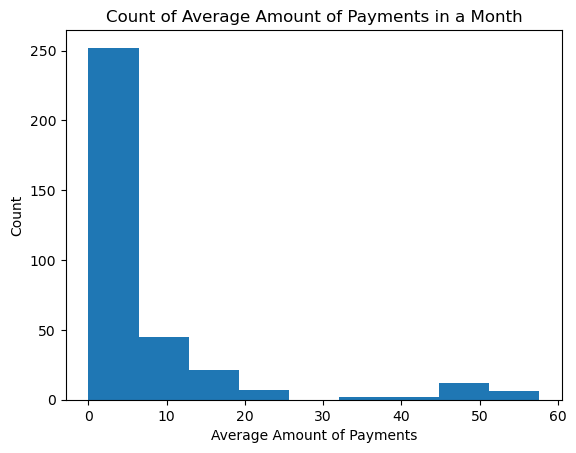

In [209]:
plt.xlabel('Average Amount of Payments')
plt.ylabel('Count')
plt.title('Count of Average Amount of Payments in a Month')
plt.hist(state_month_payment_trans_avg, bins=9)

In [212]:
state_month_equipment_trans_avg = df3.groupby(['month_year','state'])['equipment_transactions'].mean()
print(state_month_equipment_trans_avg.sort_values(ascending=False).head(10))

month_year  state
2018-08     NM       173.193548
2018-07     NM       163.387097
2018-06     NM       161.000000
2017-06     NM       159.233333
2017-07     NM       150.935484
2018-09     NM       150.933333
2018-10     NM       145.258065
2018-05     NM       142.967742
2017-08     NM       142.322581
2018-04     NM       132.966667
Name: equipment_transactions, dtype: float64


(array([ 81.,  43., 121.,  64.,  14.,   5.,   1.,   9.,   5.,   4.]),
 array([  0.        ,  17.31935484,  34.63870968,  51.95806452,
         69.27741935,  86.59677419, 103.91612903, 121.23548387,
        138.55483871, 155.87419355, 173.19354839]),
 <BarContainer object of 10 artists>)

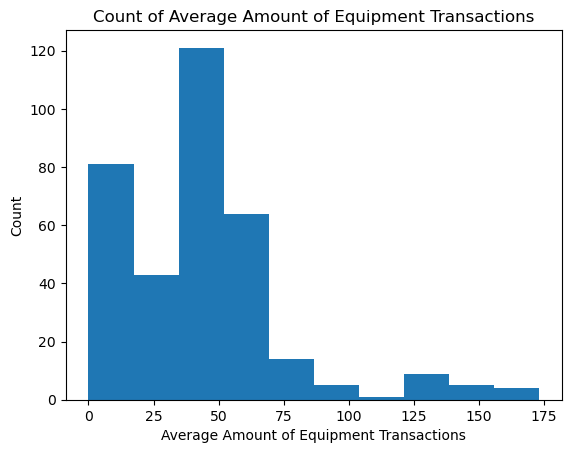

In [214]:
plt.xlabel('Average Amount of Equipment Transactions')
plt.ylabel('Count')
plt.title('Count of Average Amount of Equipment Transactions')
plt.hist(state_month_equipment_trans_avg)

In [193]:
state_month_work_order_trans_avg = df3.groupby(['month_year','state'])['work_order_transactions'].mean()
print(state_day_work_order_trans_avg.sort_values(ascending=False).head(20))

month_day  state
08-01      CO       88.736434
10-01      CO       76.631579
09-01      CO       74.806202
06-01      CO       74.142857
07-01      CO       72.666667
05-01      CO       61.898305
02-29      AZ       61.000000
           NM       60.400000
03-01      CO       59.521368
12-01      CO       59.336364
02-01      CO       59.008547
08-03      NM       56.100000
08-10      NM       54.500000
07-01      NM       54.315789
08-17      NM       54.000000
02-29      UT       53.727273
08-15      NM       53.600000
08-31      NM       53.050000
08-24      NM       52.850000
07-29      NM       52.700000
Name: work_order_transactions, dtype: float64


(array([16., 95., 58., 56., 31., 29., 30., 14., 12.,  6.]),
 array([12.1       , 20.28032258, 28.46064516, 36.64096774, 44.82129032,
        53.0016129 , 61.18193548, 69.36225806, 77.54258065, 85.72290323,
        93.90322581]),
 <BarContainer object of 10 artists>)

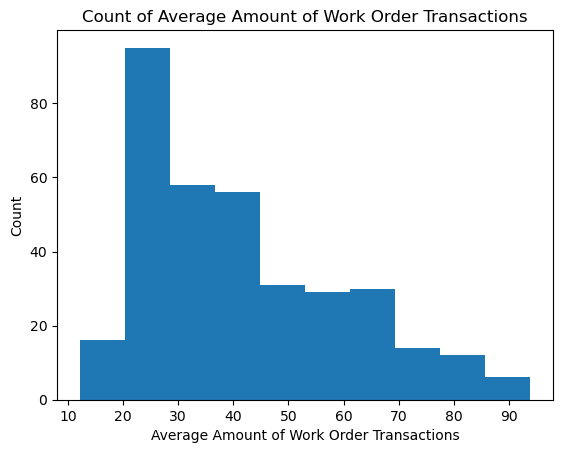

In [220]:
plt.xlabel('Average Amount of Work Order Transactions')
plt.ylabel('Count')
plt.title('Count of Average Amount of Work Order Transactions')
plt.hist(state_month_work_order_trans_avg)

<AxesSubplot:>

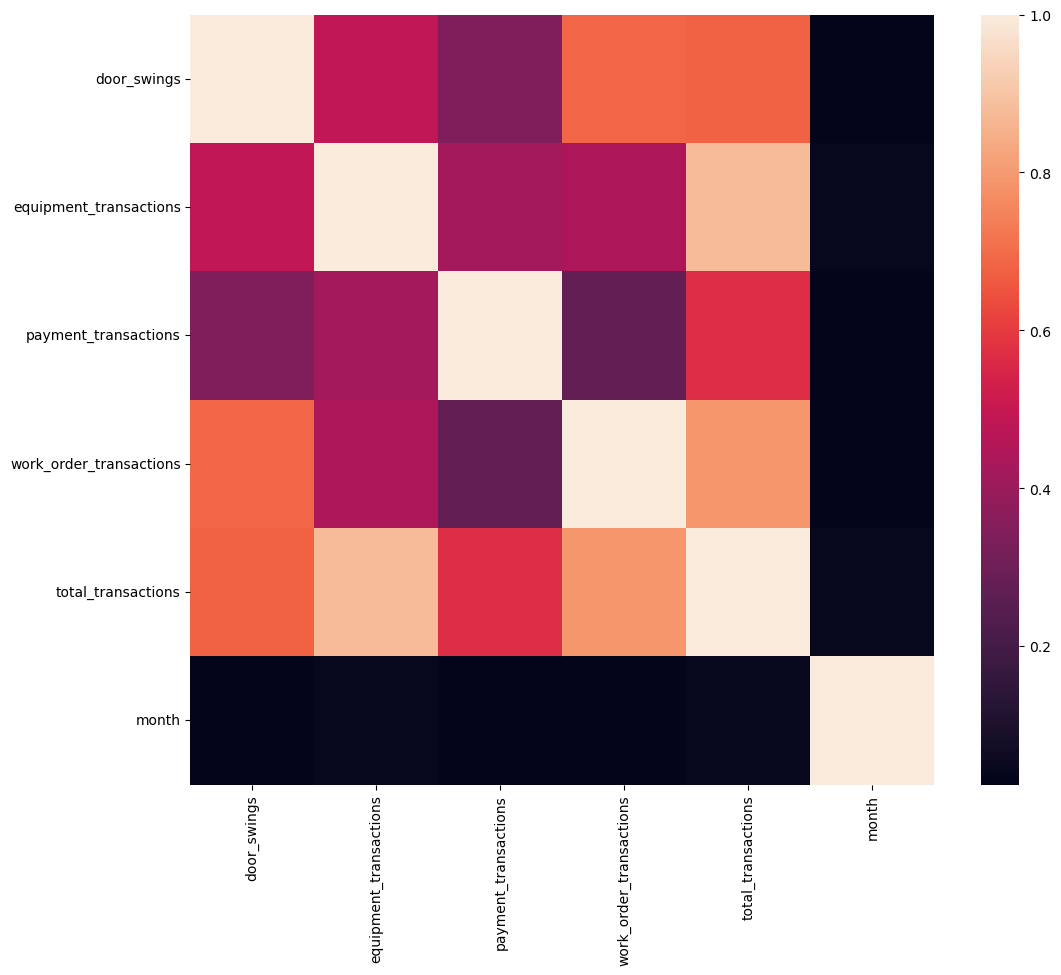

In [166]:
plt.subplots(figsize=(12,10))
sns.heatmap(df3.corr())

### 1.4.2 Hypothesis #2

I would like to research if there are certain days when customers want to come in more often.

#### 1.4.1.1 Explore the Data

In [151]:
df4 = pd.merge(df,df2, how='left')

In [152]:
df4['month_day'] = df['date'].dt.strftime('%m-%d')
df4['year'] = df['date'].dt.year

In [153]:
print(df4)

            date                                         store_name  \
0     2014-12-22                        3351 - Albuquerque, NM (XF)   
1     2014-12-22                           3352 - Lakewood, CO (XF)   
2     2014-12-22                   3353 - Colorado Springs, CO (XF)   
3     2014-12-22                           3354 - Thornton, CO (XF)   
4     2014-12-22                            3356 - Boulder, CO (XF)   
...          ...                                                ...   
74784 2022-11-20  59034 - Highbury Centre - West Valley City, UT...   
74785 2022-11-20            59038 -  Diamond Plaza - Ogden, UT (XF)   
74786 2022-11-20  59046 - Broadmoor Towne Center - Colorado Spri...   
74787 2022-11-20                   59055 - Albuquerque, NM (Uptown)   
74788 2022-11-20          59056 - Albuquerque, NM (Cottonwood) (BP)   

                   city state  door_swings  equipment_transactions  \
0           Albuquerque    NM          656                     0.0   
1      

#### 1.4.2.2 Analyzing the Data

In [154]:
store_day_total_trans_max = df4.groupby(['month_day','year','store_name'])['total_transactions'].max()
print(store_day_total_trans_max.sort_values(ascending=False).head(10))

month_day  year  store_name                                  
07-01      2021  59002 - Greeley - Greeley, CO (XF)              865.0
09-01      2021  59002 - Greeley - Greeley, CO (XF)              807.0
08-01      2021  59002 - Greeley - Greeley, CO (XF)              803.0
06-01      2021  59002 - Greeley - Greeley, CO (XF)              763.0
10-01      2021  59002 - Greeley - Greeley, CO (XF)              756.0
07-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    694.0
08-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    667.0
10-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    642.0
09-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    634.0
05-01      2021  59002 - Greeley - Greeley, CO (XF)              626.0
Name: total_transactions, dtype: float64


In [162]:
store_day_total_trans_avg = df4.groupby(['month_day','store_name'])['total_transactions'].mean()
print(store_day_total_trans_avg.sort_values(ascending=False).head(10))

month_day  store_name                                  
09-01      59002 - Greeley - Greeley, CO (XF)              377.50
08-01      59002 - Greeley - Greeley, CO (XF)              367.75
07-01      59002 - Greeley - Greeley, CO (XF)              367.50
06-01      59002 - Greeley - Greeley, CO (XF)              364.75
10-01      59002 - Greeley - Greeley, CO (XF)              364.25
07-01      59000 - Southwest Plaza - Littleton, CO (XF)    348.00
08-01      59000 - Southwest Plaza - Littleton, CO (XF)    342.50
10-01      59000 - Southwest Plaza - Littleton, CO (XF)    320.25
09-01      59000 - Southwest Plaza - Littleton, CO (XF)    307.75
02-01      59002 - Greeley - Greeley, CO (XF)              296.00
Name: total_transactions, dtype: float64


In [156]:
store_day_payment_trans_max = df4.groupby(['month_day','year','store_name'])['payment_transactions'].max()
print(store_day_payment_trans_max.sort_values(ascending=False).head(10))

month_day  year  store_name                                     
09-03      2019  3355 - Las Cruces, NM (XF)                         170.0
07-01      2022  3351 - Albuquerque, NM (XF)                        166.0
                 3362 - Pueblo, CO (XF)                             166.0
07-03      2018  3352 - Lakewood, CO (XF)                           163.0
07-01      2022  3355 - Las Cruces, NM (XF)                         155.0
11-03      2017  3351 - Albuquerque, NM (XF)                        140.0
07-01      2022  3367 - Animas Valley Mall - Farmington, NM (XF)    135.0
08-03      2022  3362 - Pueblo, CO (XF)                             130.0
02-14      2018  3353 - Colorado Springs, CO (XF)                   129.0
11-02      2018  3351 - Albuquerque, NM (XF)                        128.0
Name: payment_transactions, dtype: float64


The first five days of the calendar month are busy with payments since customers receive their benefits from the government.

In [158]:
store_day_payment_trans_avg = df4.groupby(['month_day','store_name'])['payment_transactions'].mean()
print(store_day_payment_trans_avg.sort_values(ascending=False).head(10))

month_day  store_name                 
07-01      3355 - Las Cruces, NM (XF)     48.000
11-01      3355 - Las Cruces, NM (XF)     47.750
09-03      3355 - Las Cruces, NM (XF)     45.750
08-03      3351 - Albuquerque, NM (XF)    45.625
11-03      3351 - Albuquerque, NM (XF)    44.500
08-01      3355 - Las Cruces, NM (XF)     43.000
07-03      3351 - Albuquerque, NM (XF)    42.500
08-02      3351 - Albuquerque, NM (XF)    42.250
11-02      3351 - Albuquerque, NM (XF)    41.375
07-01      3351 - Albuquerque, NM (XF)    40.625
Name: payment_transactions, dtype: float64


Las Cruces and Albuquerque have the largest amount of average payments on the first three days of the month.

In [146]:
store_day_equipment_trans_max = df4.groupby(['month_day','year','store_name'])['equipment_transactions'].max()
print(store_day_equipment_trans_max.sort_values(ascending=False).head(10))

month_day  year  store_name                 
04-30      2019  3356 - Boulder, CO (XF)        336.0
08-02      2021  3356 - Boulder, CO (XF)        256.0
08-12      2019  3356 - Boulder, CO (XF)        252.0
07-31      2017  3356 - Boulder, CO (XF)        252.0
           2021  3356 - Boulder, CO (XF)        245.0
08-14      2017  3351 - Albuquerque, NM (XF)    241.0
07-27      2018  3351 - Albuquerque, NM (XF)    238.0
07-30      2018  3351 - Albuquerque, NM (XF)    237.0
08-06      2018  3351 - Albuquerque, NM (XF)    235.0
09-01      2018  3351 - Albuquerque, NM (XF)    234.0
Name: equipment_transactions, dtype: float64


In [160]:
store_day_equipment_trans_max = df4.groupby(['month_day','store_name'])['equipment_transactions'].mean()
print(store_day_equipment_trans_max.sort_values(ascending=False).head(10))

month_day  store_name                                  
07-31      3356 - Boulder, CO (XF)                         146.375
07-30      3356 - Boulder, CO (XF)                         128.250
02-29      59002 - Greeley - Greeley, CO (XF)              126.000
           3460 - Jordan Landing - West Jordan, UT (XF)    124.000
           59000 - Southwest Plaza - Littleton, CO (XF)    124.000
07-31      3358 - Denver, CO (XF)                          122.000
06-29      3351 - Albuquerque, NM (XF)                     113.000
08-24      3351 - Albuquerque, NM (XF)                     112.750
07-31      3351 - Albuquerque, NM (XF)                     112.250
07-27      3351 - Albuquerque, NM (XF)                     111.625
Name: equipment_transactions, dtype: float64


In [148]:
store_day_work_order_trans_max = df4.groupby(['month_day','year','store_name'])['work_order_transactions'].max()
print(store_day_work_order_trans_max.sort_values(ascending=False).head(10))

month_day  year  store_name                                  
07-01      2021  59002 - Greeley - Greeley, CO (XF)              794.0
08-01      2021  59002 - Greeley - Greeley, CO (XF)              749.0
09-01      2021  59002 - Greeley - Greeley, CO (XF)              739.0
10-01      2021  59002 - Greeley - Greeley, CO (XF)              692.0
06-01      2021  59002 - Greeley - Greeley, CO (XF)              654.0
07-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    635.0
08-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    629.0
10-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    591.0
05-01      2021  59002 - Greeley - Greeley, CO (XF)              574.0
09-01      2021  59000 - Southwest Plaza - Littleton, CO (XF)    570.0
Name: work_order_transactions, dtype: float64


In [169]:
store_day_work_order_trans_avg = df4.groupby(['month_day','store_name'])['work_order_transactions'].mean()
print(store_day_work_order_trans_avg.sort_values(ascending=False).head(10))

month_day  store_name                                  
08-01      59002 - Greeley - Greeley, CO (XF)              308.25
09-01      59002 - Greeley - Greeley, CO (XF)              303.00
07-01      59002 - Greeley - Greeley, CO (XF)              300.50
10-01      59002 - Greeley - Greeley, CO (XF)              294.00
08-01      59000 - Southwest Plaza - Littleton, CO (XF)    280.25
07-01      59000 - Southwest Plaza - Littleton, CO (XF)    278.50
06-01      59002 - Greeley - Greeley, CO (XF)              269.50
10-01      59000 - Southwest Plaza - Littleton, CO (XF)    258.25
09-01      59000 - Southwest Plaza - Littleton, CO (XF)    253.25
05-01      59002 - Greeley - Greeley, CO (XF)              234.25
Name: work_order_transactions, dtype: float64


I was interested to see how the data breaks up by state instead of by store.

In [183]:
state_day_total_trans_avg = df4.groupby(['month_day','state'])['total_transactions'].mean()
print(state_day_total_trans_avg.sort_values(ascending=False).head(15))

month_day  state
08-01      CO       159.565891
02-29      AZ       158.000000
07-01      NM       156.947368
08-03      NM       152.100000
08-31      NM       142.950000
06-01      CO       141.680672
08-10      NM       141.350000
08-01      NM       140.550000
07-29      NM       139.800000
07-01      CO       138.246032
08-15      NM       137.000000
07-02      NM       136.894737
08-19      NM       135.750000
06-29      NM       135.631579
08-02      NM       134.600000
Name: total_transactions, dtype: float64


I found it interesting that AZ has the second highest average transactions on a leap year date.

In [189]:
state_day_payment_trans_avg = df4.groupby(['month_day','state'])['payment_transactions'].mean()
print(state_day_payment_trans_avg.sort_values(ascending=False).head(50))

month_day  state
07-01      NM       40.105263
08-03      NM       34.150000
11-01      NM       32.045455
07-05      NM       31.947368
08-02      NM       31.050000
08-01      NM       30.400000
11-03      NM       28.500000
07-15      NM       26.650000
11-02      NM       26.227273
07-06      NM       25.842105
07-12      NM       25.700000
08-04      NM       25.650000
11-04      NM       25.272727
07-03      NM       24.473684
08-31      NM       23.900000
07-02      NM       23.684211
08-15      NM       23.500000
06-30      NM       23.000000
08-10      NM       22.800000
02-05      NM       22.333333
07-29      NM       22.100000
08-12      NM       21.900000
08-05      NM       21.900000
08-30      NM       21.800000
11-07      NM       21.681818
09-21      NM       21.666667
07-08      NM       21.600000
07-19      NM       21.350000
07-16      NM       21.350000
08-08      NM       21.300000
07-13      NM       21.300000
08-19      NM       21.250000
08-16      NM       21.

I wanted to see if NM was the only state with the highest payment transactions. With pulling the top 50 rows, no other states populated besides NM.

In [185]:
state_day_equipment_trans_max = df4.groupby(['month_day','state'])['equipment_transactions'].mean()
print(state_day_equipment_trans_max.sort_values(ascending=False).head(15))

month_day  state
02-29      AZ       96.000000
06-29      NM       67.421053
07-31      CO       67.077519
           NM       67.000000
08-31      NM       66.000000
08-24      NM       65.850000
07-27      NM       65.150000
07-29      NM       65.000000
07-30      NM       64.600000
07-02      NM       64.421053
08-14      NM       64.200000
08-10      NM       64.050000
08-18      NM       64.000000
08-13      NM       63.750000
08-01      CO       63.015504
Name: equipment_transactions, dtype: float64


In [186]:
state_day_work_order_trans_avg = df4.groupby(['month_day','state'])['work_order_transactions'].mean()
print(state_day_work_order_trans_avg.sort_values(ascending=False).head(15))

month_day  state
08-01      CO       88.736434
10-01      CO       76.631579
09-01      CO       74.806202
06-01      CO       74.142857
07-01      CO       72.666667
05-01      CO       61.898305
02-29      AZ       61.000000
           NM       60.400000
03-01      CO       59.521368
12-01      CO       59.336364
02-01      CO       59.008547
08-03      NM       56.100000
08-10      NM       54.500000
07-01      NM       54.315789
08-17      NM       54.000000
Name: work_order_transactions, dtype: float64


<AxesSubplot:>

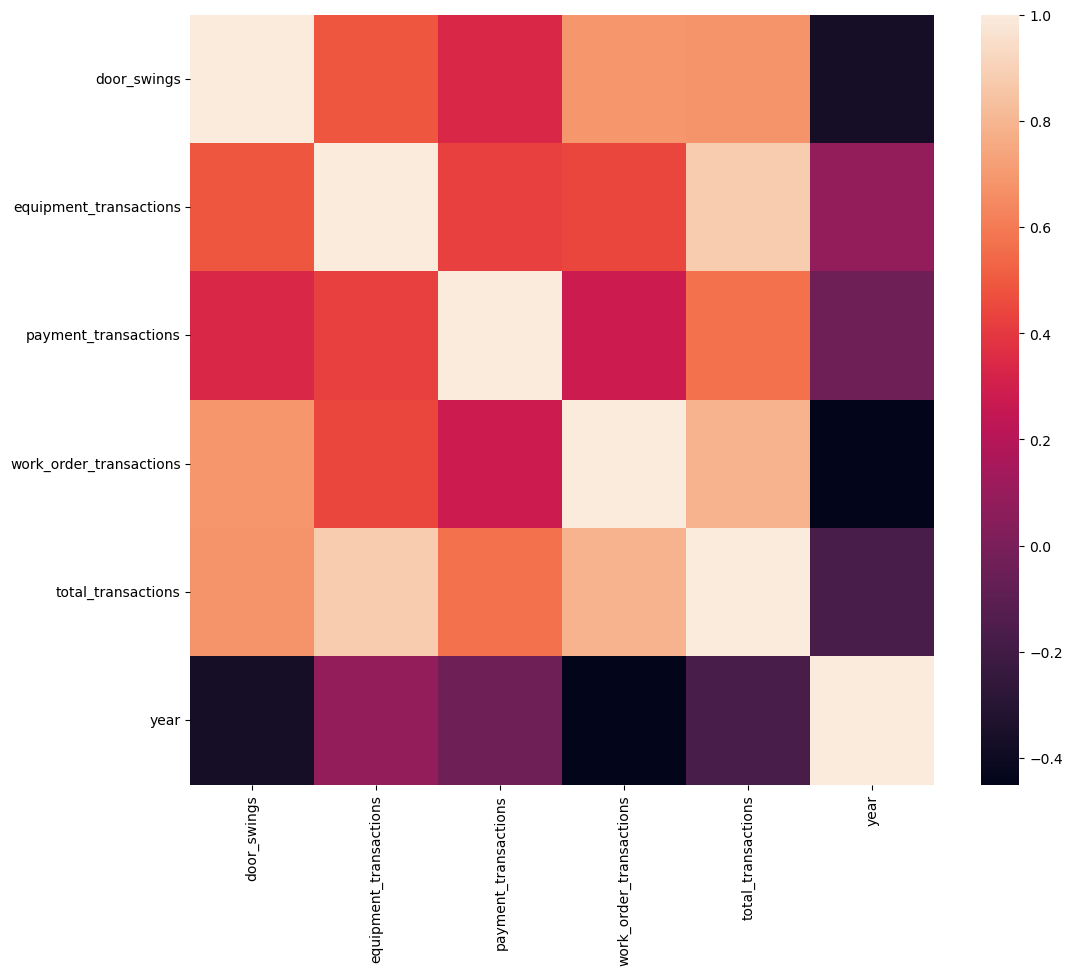

In [165]:
plt.subplots(figsize=(12,10))
sns.heatmap(df4.corr())

## 1.5 Summary

In this analysis, we found that customers like to make payments in the first five days of the week. Customers normally receive their benefits (social security, state benefits) in the first week of the month. On both heatmaps, total transactions and work order transactions have a pretty close relationship with door swings.